In [1]:
import pandas as pd
import CococoNet_reader
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns


In [2]:
low_heat_populus_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Populus_vs_glycine_drought/Populus/populus_control/Run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_populus_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Populus_vs_glycine_drought/Populus/populus_control/Run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_populus_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Populus_vs_glycine_drought/Populus/populus_control/Run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


low_heat_populus= pd.DataFrame(
    data=zip(
        low_heat_populus_1["Reads"],
        low_heat_populus_2["Reads"],
        low_heat_populus_3["Reads"],
    ),
    columns=["populus Cold Rep 1", "populus Cold Rep 2" ,"populus Cold Rep 3",],
    index=low_heat_populus_1.index,
)


In [3]:
low_heat_populus

,populus Cold Rep 1,populus Cold Rep 2,populus Cold Rep 3
LOC112326525,228,261,206
LOC7483226,0,0,0
LOC112329039,28,40,34
LOC7457680,0,0,0
LOC7483220,514,640,648
...,...,...,...
Poptr_cp098,0,0,0
Poptr_cpR045,0,0,0
Poptr_cp099,0,0,0
Poptr_cp100,0,0,0


In [4]:
high_heat_populus_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Populus_vs_glycine_drought/Populus/Populus_drought/Run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_populus_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Populus_vs_glycine_drought/Populus/Populus_drought/Run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_populus_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Populus_vs_glycine_drought/Populus/Populus_drought/Run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


high_heat_populus= pd.DataFrame(
    data=zip(
        high_heat_populus_1["Reads"],
        high_heat_populus_2["Reads"],
        high_heat_populus_3["Reads"],
    ),
    columns=["populus Hot Rep 1", "populus Hot Rep 2" ,"populus Hot Rep 3",],
    index=high_heat_populus_1.index,
)


In [5]:
high_heat_populus

,populus Hot Rep 1,populus Hot Rep 2,populus Hot Rep 3
LOC112326525,156,174,167
LOC7483226,0,0,0
LOC112329039,24,25,27
LOC7457680,0,0,0
LOC7483220,531,606,577
...,...,...,...
Poptr_cp098,0,0,0
Poptr_cpR045,0,0,0
Poptr_cp099,0,0,0
Poptr_cp100,0,0,0


In [6]:
combined_populus = pd.concat([low_heat_populus, high_heat_populus], axis=1)

In [7]:
combined_populus

,populus Cold Rep 1,populus Cold Rep 2,populus Cold Rep 3,populus Hot Rep 1,populus Hot Rep 2,populus Hot Rep 3
LOC112326525,228,261,206,156,174,167
LOC7483226,0,0,0,0,0,0
LOC112329039,28,40,34,24,25,27
LOC7457680,0,0,0,0,0,0
LOC7483220,514,640,648,531,606,577
...,...,...,...,...,...,...
Poptr_cp098,0,0,0,0,0,0
Poptr_cpR045,0,0,0,0,0,0
Poptr_cp099,0,0,0,0,0,0
Poptr_cp100,0,0,0,0,0,0


In [8]:
populus_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Cold", "Cold", "Cold", "Hot", "Hot", "Hot"],
    index=[
        "populus Cold Rep 1",
        "populus Cold Rep 2",
        "populus Cold Rep 3",
        "populus Hot Rep 1",
        "populus Hot Rep 2",
        "populus Hot Rep 3",
    ],
)

In [22]:
low_heat_soybean_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Populus_vs_glycine_drought/Soybean/Soybean_control/Run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_soybean_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Populus_vs_glycine_drought/Soybean/Soybean_control/Run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_soybean_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Populus_vs_glycine_drought/Soybean/Soybean_control/Run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)



low_heat_soybean = pd.DataFrame(
    data=zip(
        low_heat_soybean_1["Reads"],
        low_heat_soybean_2["Reads"],
        low_heat_soybean_3["Reads"],
    ),
    columns=["soybean Cold Rep 1", "soybean Cold Rep 2", "soybean Cold Rep 3",],
    index=low_heat_soybean_1.index,
)


In [23]:
low_heat_soybean.index = low_heat_soybean.index.str.split('.').str[0].str.upper()+'_' + low_heat_soybean.index.str.split('.').str[1]

In [24]:
# low_heat_soybean.index = low_heat_soybean.index.str.split(':').str[1]
low_heat_soybean

,soybean Cold Rep 1,soybean Cold Rep 2,soybean Cold Rep 3
GLYMA_01G000322,31,19,8
GLYMA_01G000400,558,243,263
GLYMA_01G000600,223,80,117
GLYMA_01G000750,0,0,0
GLYMA_01G000900,334,163,208
...,...,...,...
GLYMA_20G249700,226,103,74
GLYMA_20G249800,2763,1417,1034
GLYMA_20G249900,44,32,43
GLYMA_20G250000,485,178,224


In [25]:
high_heat_soybean_rep_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Populus_vs_glycine_drought/Soybean/Soybean_drought_T0/Run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_soybean_rep_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Populus_vs_glycine_drought/Soybean/Soybean_drought_T0/Run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_soybean_rep_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Populus_vs_glycine_drought/Soybean/Soybean_drought_T0/Run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


high_heat_soybean = pd.DataFrame(
    data=zip(
        high_heat_soybean_rep_1["Reads"],
        high_heat_soybean_rep_2["Reads"],
        high_heat_soybean_rep_3["Reads"],
    ),
    columns=["soybean Hot Rep 1", "soybean Hot Rep 2", "soybean Hot Rep 3",],
    index=low_heat_soybean_1.index,
)

In [26]:
high_heat_soybean.index = high_heat_soybean.index.str.split('.').str[0].str.upper()+'_' + high_heat_soybean.index.str.split('.').str[1]
high_heat_soybean

,soybean Hot Rep 1,soybean Hot Rep 2,soybean Hot Rep 3
GLYMA_01G000322,12,16,10
GLYMA_01G000400,156,172,122
GLYMA_01G000600,87,93,84
GLYMA_01G000750,0,0,0
GLYMA_01G000900,129,149,99
...,...,...,...
GLYMA_20G249700,47,70,81
GLYMA_20G249800,902,989,1076
GLYMA_20G249900,24,39,36
GLYMA_20G250000,176,247,173


In [27]:
combined_soybean = pd.concat([high_heat_soybean, low_heat_soybean], axis=1)

In [28]:
combined_soybean = combined_soybean.T




In [29]:
combined_populus = combined_populus.T

In [30]:
combined_populus.to_csv("/data/passala/Module_paper_data/Populus_vs_glycine_drought/Ortho_vs_gene_files/populus_reads.csv")
combined_soybean.to_csv("/data/passala/Module_paper_data/Populus_vs_glycine_drought/Ortho_vs_gene_files/soybean_reads.csv")

In [31]:
soybean_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Hot", "Hot", "Hot","Cold","Cold", "Cold", ],
    index=[
        "soybean Hot Rep 1",
        "soybean Hot Rep 2",
        "soybean Hot Rep 3",
        "soybean Cold Rep 1",
        "soybean Cold Rep 2",
        "soybean Cold Rep 3",
    ],
)

In [32]:
genes_to_keep_populus = combined_populus.columns[combined_populus.sum(axis=0) >= 100]
combined_populus = combined_populus[genes_to_keep_populus]
inference_populus = DefaultInference(n_cpus=30)
dds_populus = DeseqDataSet(
    counts=combined_populus,
    metadata=populus_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference_populus,
)
dds_populus.deseq2()
stat_res_populus = DeseqStats(dds_populus, inference=inference_populus)
stat_res_populus.summary()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 1.41 seconds.

Fitting dispersion trend curve...
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 1.38 seconds.

Fitting LFCs...
... done in 1.43 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                 baseMean  log2FoldChange     lfcSE      stat    pvalue  \
LOC112326525   197.942589       -0.435427  0.191621 -2.272333  0.023066   
LOC112329039    29.455282       -0.367292  0.336223 -1.092404  0.274655   
LOC7483220     582.515487       -0.013105  0.133364 -0.098263  0.921724   
LOC7457681      73.350870       -0.519553  0.265497 -1.956904  0.050359   
LOC7457682    1156.143971       -0.061269  0.105583 -0.580292  0.561717   
...                   ...             ...       ...       ...       ...   
Poptr_cpR029    38.119448       -0.146266  0.435424 -0.335917  0.736933   
Poptr_cp079     29.792020        0.573790  0.349242  1.642958  0.100392   
Poptr_cp084     20.457974        0.874806  0.485028  1.803619  0.071291   
Poptr_cpR039    36.556651       -0.112338  0.383193 -0.293163  0.769398   
Poptr_cpR042    38.968893       -0.359194  0.455574 -0.788444  0.430437   

                  padj  
LOC112326525  0.059

... done in 0.92 seconds.



In [33]:
genes_to_keep = combined_soybean.columns[combined_soybean.sum(axis=0) >= 100]
combined_soybean = combined_soybean[genes_to_keep]
inference = DefaultInference(n_cpus=30)
dds = DeseqDataSet(
    counts=combined_soybean,
    metadata=soybean_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference,
)
dds.deseq2()
stat_res_soybean = DeseqStats(dds, inference=inference)
stat_res_soybean.summary()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 1.61 seconds.

Fitting dispersion trend curve...
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 1.67 seconds.

Fitting LFCs...
... done in 1.46 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
GLYMA_01G000400   224.365209       -0.560751  0.197534 -2.838758  0.004529   
GLYMA_01G000600   106.238981        0.030497  0.252662  0.120702  0.903927   
GLYMA_01G000900   167.690179       -0.274119  0.228812 -1.198009  0.230913   
GLYMA_01G001000   112.427969        0.308408  0.252900  1.219487  0.222659   
GLYMA_01G001100   268.653460        0.262773  0.264730  0.992604  0.320903   
...                      ...             ...       ...       ...       ...   
GLYMA_20G249700    90.265560       -0.280145  0.311787 -0.898516  0.368911   
GLYMA_20G249800  1263.688041       -0.100402  0.223715 -0.448793  0.653581   
GLYMA_20G249900    36.938599        0.299987  0.396026  0.757492  0.448755   
GLYMA_20G250000   229.524300        0.129423  0.213520  0.606138  0.544423   
GLYMA_20G250200    91.773440       -0.148462  0.271352 -0.547118  0.584298   

        

... done in 1.15 seconds.



In [34]:
full_results_soybean = stat_res_soybean.results_df
full_results_soybean
full_results_populus = stat_res_populus.results_df

In [35]:
full_results_soybean.to_csv('/data/passala/Module_paper_data/Populus_vs_glycine_drought/Ortho_vs_gene_files/soybean_gene_results.csv')
full_results_populus.to_csv('/data/passala/Module_paper_data/Populus_vs_glycine_drought/Ortho_vs_gene_files/populus_gene_results.csv')

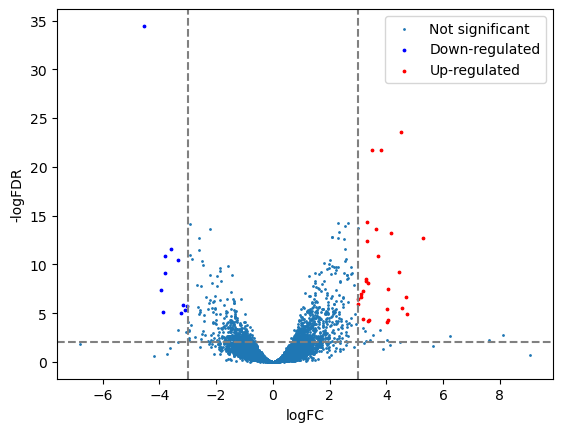

In [24]:
plt.scatter(x=full_results_soybean['log2FoldChange'],y=full_results_soybean['padj'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down_arabi = full_results_soybean[(full_results_soybean['log2FoldChange']<=-3)&(full_results_soybean['padj']<=0.0001)]
up_arabi = full_results_soybean[(full_results_soybean['log2FoldChange']>=3)&(full_results_soybean['padj']<=0.0001)]

plt.scatter(x=down_arabi['log2FoldChange'],y=down_arabi['padj'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up_arabi['log2FoldChange'],y=up_arabi['padj'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3,color="grey",linestyle="--")
plt.axvline(3,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()

In [ ]:
up_arabi

In [ ]:
up

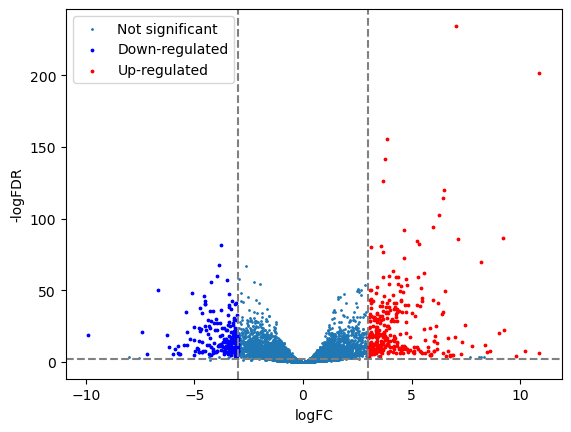

In [25]:
plt.scatter(x=full_results_populus['log2FoldChange'],y=full_results_populus['padj'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down = full_results_populus[(full_results_populus['log2FoldChange']<=-3)&(full_results_populus['padj']<=0.0001)]
up = full_results_populus[(full_results_populus['log2FoldChange']>=3)&(full_results_populus['padj']<=0.0001)]

plt.scatter(x=down['log2FoldChange'],y=down['padj'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['log2FoldChange'],y=up['padj'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3,color="grey",linestyle="--")
plt.axvline(3,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()